# 2. Models Evaluation


## To Do

- GridSearch/Random Search for each model: 
- logistic regression
- decision tree  .. .randomforrest, and get feature importance to help refine number of features .. but need lables?
- neural network

- Repeat with PCA components
- Repeat with changes in features
- ?? SMOTE

- Compare across all models
- ?? What are the best evaluation metrics to use? Make sure understand their interpretation

!! NB
- lower gini index is better

## Imports & Functions

In [16]:
# Import typically used packages
import pandas as pd
import numpy as np
import sklearn as sk

import time

# ML Prep & Modelling
import sklearn
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, RocCurveDisplay

# Import plotting packages
import matplotlib.pyplot as plt
plt.style.use('ggplot')
#plt.style.use('default')

In [17]:
# Function to Present the Evaluation Metrics for a Classification Model

def classification_metrics(for_Model, X_test, y_test, y_pred):
    plt.style.use('default')

    # Calculate Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    tn, fp, fn, tp = cm.ravel()

    # Print various metrics
    print(f'Accuracy: {metrics.accuracy_score(y_true=y_test, y_pred=y_pred):.4f}')
    print(f'Precision: {metrics.precision_score(y_true=y_test, y_pred=y_pred, pos_label="yes"):.4f}')
    print(f'Recall: {metrics.recall_score(y_true=y_test, y_pred=y_pred, pos_label="yes"):.4f}')
    print(f'F1 Score {metrics.f1_score(y_true=y_test, y_pred=y_pred, pos_label="yes"):.4f}')
    print(f'Specificity: {tn / (tn + fp):.4f}')
    print(f'Hamming Loss {metrics.hamming_loss(y_true=y_test, y_pred=y_pred):.4f}')


    # Plot Confusion Matrix
    class_labels = for_Model.classes_
    fig, ax = plt.subplots(figsize=(12,4))
    ax.set_title('Confusion Matrix')
    ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_labels).plot(ax=ax)
    plt.show

    y_probabilities = for_Model.predict_proba(X_test)[:, 1]
    roc_auc_score = metrics.roc_auc_score(y_true=y_test, y_score=y_probabilities)
    print(f'ROC-AUC Score {roc_auc_score:.4f}')
    gini_score = 2 * roc_auc_score - 1
    print(f'Gini Index: {gini_score:.4f}')

    # Plot the ROC curve
    fig, ax = plt.subplots(figsize=(6,4))
    ax.set_title('ROC Curve')
    roc_display = RocCurveDisplay.from_estimator(for_Model, X_test, y_test, ax=ax, pos_label="yes")
    plt.show()

    plt.style.use('ggplot')

In [18]:
def print_search_results(search, duration):
    print('------- Search Results --------')
    all_search_results = pd.DataFrame(search.cv_results_)
    print(f"Score: {search.best_score_:.4f}. Mean: {np.mean(all_search_results['mean_test_score']):.4f} and STD {np.std(all_search_results['mean_test_score']):.4f}")
    print(f'Search Took: {duration:.2f} seconds')
    print(f"Best Parameters: {search.best_params_}")
    top_n = 10
    print(f"Top {top_n} out of {len(all_search_results)} combinations:")
    display(all_search_results[['rank_test_score', 'mean_test_score', 'mean_fit_time', 'mean_score_time', 'params']].sort_values(by='rank_test_score').head(top_n))

## Load the Data

In [19]:
# Load saved dataset
import pickle

with open('xy_data.pickle', 'rb') as file:
    X_train, X_test, y_train, y_test = pickle.load(file)

## Temp

## Train Different Models - Logistic Regression

In [21]:
param_grid = {'class_weight': [{0:1, 1:100}, {0:1, 1:10}, 'balanced']}
grid = GridSearchCV(LogisticRegression(solver='lbfgs'), param_grid, scoring='roc_auc')
grid.fit(X, y)

NameError: name 'X' is not defined

In [ ]:
# Logistic Regression
# Establish a pipeline for a randomised search & get the best fitted model

logreg_pipeline = make_pipeline(
    LogisticRegression(random_state=42)
)
grid_params = {
    'logisticregression__penalty': ['l1', 'l2'],                # L1 or L2 regularisation
    'logisticregression__solver': ['saga', 'liblinear'],        # Saga is a variant of Sag. With L1 or l2. Large dataset. liblinear is for small datasets, binary classifications
    'logisticregression__C': [0.01, 0.1, 1, 5],                 # Strength of regularisation, default is 1, smaller is stronger
    'logisticregression__max_iter': [500, 600],                 # Max 500 iterations seems to be sufficient
    'logisticregression__class_weight': ['balanced']  
}                       

# Run the search
start_time = time.perf_counter()
#rand_search = RandomizedSearchCV(logreg_pipeline, grid_params, scoring='roc_auc', cv=5, refit='accuracy')
rand_search = RandomizedSearchCV(logreg_pipeline, grid_params, scoring='roc_auc', cv=5)
rand_search.fit(X_train, y_train)
duration = time.perf_counter() - start_time

# Show the results
print_search_results(rand_search, duration)
print(rand_search.cv_results_)

# Get the Best Model & Calculate Predicted Y and Evaluate
model_logreg_rand = rand_search.best_estimator_
print(model_logreg_rand)
print(rand_search.best_score_)
print(rand_search.best_params_)

y_pred = model_logreg_rand.predict(X_test)
classification_metrics(model_logreg_rand, X_test, y_test, y_pred)

In [ ]:
# Logistic Regression
# Establish a pipeline for a randomised search & get the best fitted model

logreg_pipeline = make_pipeline(
    LogisticRegression(random_state=42)
)
grid_params = {
    'logisticregression__penalty': ['l1', 'l2'],                # L1 or L2 regularisation
    'logisticregression__solver': ['saga', 'liblinear'],        # Saga is a variant of Sag. With L1 or l2. Large dataset. liblinear is for small datasets, binary classifications
    'logisticregression__C': [0.01, 0.1, 1, 5],                 # Strength of regularisation, default is 1, smaller is stronger
    'logisticregression__max_iter': [1000]                  # Max 500 iterations seems to be sufficient
}                       

# Run the search
start_time = time.perf_counter()
rand_search = RandomizedSearchCV(logreg_pipeline, grid_params, scoring='accuracy', cv=5, refit='accuracy')
rand_search.fit(X_train, y_train)
duration = time.perf_counter() - start_time

# Show the results
print_search_results(rand_search, duration)

# Get the Best Model & Calculate Predicted Y and Evaluate
model_logreg_rand = rand_search.best_estimator_
y_pred = model_logreg_rand.predict(X_test)
classification_metrics(model_logreg_rand, X_test, y_test, y_pred)


In [ ]:
# Show the results
print_search_results(rand_search, duration)

In [ ]:
# Get the Best Model & Calculate Predicted Y and Evaluate
model_logreg_rand = rand_search.best_estimator_
y_pred = model_logreg_rand.predict(X_test)
classification_metrics(model_logreg_rand, X_test, y_test, y_pred)

In [ ]:
# Logistic Regression
# Establish a pipeline for a grid search & get the best fitted model

logreg_pipeline = make_pipeline(
    LogisticRegression(random_state=42)
)
grid_params = {
    'logisticregression__penalty': ['l1', 'l2'],                # L1 or L2 regularisation
    'logisticregression__solver': ['saga', 'liblinear'],        # Saga is a variant of Sag. With L1 or l2. Large dataset. liblinear is for small datasets, binary classifications
    'logisticregression__C': [0.01, 0.1, 1, 5],                 # Strength of regularisation, default is 1, smaller is stronger
    'logisticregression__max_iter': [500]                       # Max 500 iterations seems to be sufficient
}                       

# Run the search
start_time = time.perf_counter()
grid_search = GridSearchCV(logreg_pipeline, grid_params, scoring='accuracy', cv=5, refit='accuracy')
grid_search.fit(X_train, y_train)
duration = time.perf_counter() - start_time


In [ ]:
# Show the results
print_search_results(grid_search, duration)

In [ ]:
# Get the Best Model & Calculate Predicted Y and Evaluate

model_logreg = grid_search.best_estimator_
y_pred = model_logreg.predict(X_test)
classification_metrics(model_logreg, y_test, y_pred)

## Train Different Models - Decision Tree

In [22]:
# Decision Tree
# Establish a pipeline for a grid search & get the best fitted model

randforest_pipeline = make_pipeline(
    RandomForestClassifier(random_state=42)
)
grid_params = {
    'randomforestclassifier__n_estimators': [200, 400],            # Number of trees
    'randomforestclassifier__max_depth': [25, 50],
    'randomforestclassifier__max_leaf_nodes': [5, 50],
    'randomforestclassifier__min_samples_split': [2, 5],
    'randomforestclassifier__class_weight': ['balanced']    # Gives more importance to minority classes ... ?? Improves recall at the expense of precision
}                       

# Run the search
start_time = time.perf_counter()
grid_search = GridSearchCV(randforest_pipeline, grid_params, cv=5)
grid_search.fit(X_train, y_train)
duration = time.perf_counter() - start_time

In [23]:
# Show the results
print_search_results(grid_search, duration)


------- Search Results --------
Score: 0.7323. Mean: 0.7002 and STD 0.0317
Search Took: 121.53 seconds
Best Parameters: {'randomforestclassifier__class_weight': 'balanced', 'randomforestclassifier__max_depth': 25, 'randomforestclassifier__max_leaf_nodes': 50, 'randomforestclassifier__min_samples_split': 5, 'randomforestclassifier__n_estimators': 200}
Top 10 out of 16 combinations:


,rank_test_score,mean_test_score,mean_fit_time,mean_score_time,params
6,1,0.732259,1.256005,0.068559,{'randomforestclassifier__class_weight': 'bala...
14,1,0.732259,1.265962,0.068191,{'randomforestclassifier__class_weight': 'bala...
4,3,0.732111,1.232781,0.066863,{'randomforestclassifier__class_weight': 'bala...
12,4,0.732087,1.329961,0.071129,{'randomforestclassifier__class_weight': 'bala...
13,5,0.731667,2.570957,0.130980,{'randomforestclassifier__class_weight': 'bala...
5,6,0.731642,2.482164,0.128361,{'randomforestclassifier__class_weight': 'bala...
7,7,0.731642,2.536731,0.131756,{'randomforestclassifier__class_weight': 'bala...
15,7,0.731642,2.544015,0.134983,{'randomforestclassifier__class_weight': 'bala...
0,9,0.669291,0.589942,0.046144,{'randomforestclassifier__class_weight': 'bala...
2,9,0.669291,0.581363,0.046295,{'randomforestclassifier__class_weight': 'bala...


Accuracy: 0.7271
Precision: 0.3772
Recall: 0.6443
F1 Score 0.4758
Specificity: 0.7468
Hamming Loss 0.2729
ROC-AUC Score 0.7634
Gini Index: 0.5268


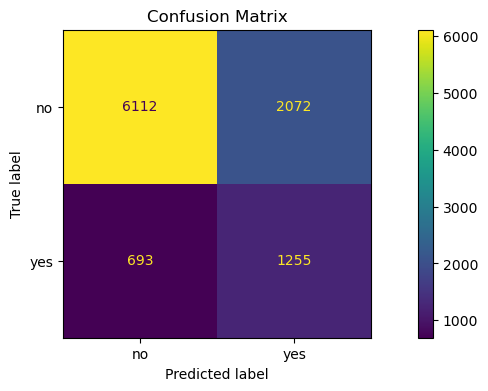

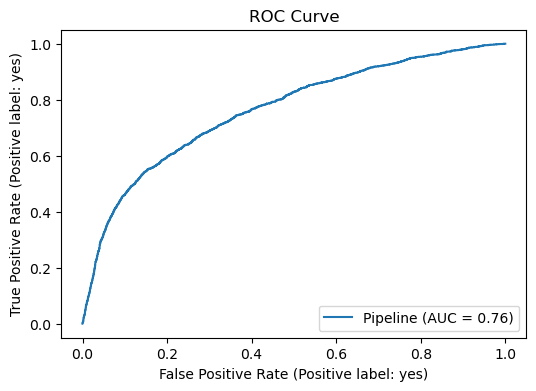

In [25]:
# Get the Best Model & Calculate Predicted Y and Evaluate

model_randforest = grid_search.best_estimator_
y_pred = model_randforest.predict(X_test)
classification_metrics(model_randforest, X_test, y_test, y_pred)

In [26]:
# Feature importance from the trained model

# Assuming you have the feature names stored in a list called feature_names
# Ensure feature_names has the correct length
feature_names = [f'feature{i+1}' for i in range(X_train.shape[1])]  # Replace with actual feature names if available

feature_importances = pd.Series(model_randforest.named_steps['randomforestclassifier'].feature_importances_, index=feature_names).sort_values(ascending=False)
print(feature_importances)


feature121    0.197913
feature118    0.120997
feature133    0.087601
feature134    0.078915
feature129    0.063179
                ...   
feature100    0.000122
feature99     0.000112
feature52     0.000099
feature14     0.000098
feature30     0.000094
Length: 135, dtype: float64


In [29]:
# Get feature importances
importances = model_randforest.named_steps['randomforestclassifier'].feature_importances_

# Print feature importances
for i, importance in enumerate(importances):
    print(f"Feature {i}: {importance}")

Feature 0: 0.0002344732679206156
Feature 1: 0.00032589188926307575
Feature 2: 0.00033633772254238197
Feature 3: 0.0001714758388069814
Feature 4: 0.000174259644310747
Feature 5: 0.0001908568356945031
Feature 6: 0.0001280820913511126
Feature 7: 0.000634325484625876
Feature 8: 0.0002029884932948381
Feature 9: 0.0002270097853069937
Feature 10: 0.00023687421721311282
Feature 11: 0.00017425459071716216
Feature 12: 0.0003432513220957357
Feature 13: 9.840818009967711e-05
Feature 14: 0.00039741024666242806
Feature 15: 0.000249484251267002
Feature 16: 0.0002871023879935244
Feature 17: 0.00019178299486534032
Feature 18: 0.0002989779847049147
Feature 19: 0.0003857723075866823
Feature 20: 0.0001523649386066063
Feature 21: 0.0002554528194837391
Feature 22: 0.0003053404730658628
Feature 23: 0.0004918440121524755
Feature 24: 0.0002136643463956255
Feature 25: 0.00022762821483481743
Feature 26: 0.0003228485002760498
Feature 27: 0.0003663126318231764
Feature 28: 0.00034332553261609127
Feature 29: 9.35364

In [ ]:

import shap

model_s = model_randforest.named_steps['randomforestclassifier']

# Convert sparse matrix to dense
X_train_dense = X_train.toarray()
X_test_dense = X_test.toarray()


# Ensure feature_names has the correct length
feature_names = [f'feature{i+1}' for i in range(X_test_dense.shape[1])]  # Replace with actual feature names if available

# Calculate SHAP values
explainer = shap.TreeExplainer(model_s)
shap_values = explainer.shap_values(X_test_dense)



In [ ]:
# Visualize individual prediction
shap.initjs()
shap.force_plot(explainer.expected_value[1], 
                shap_values[1][100], 
                X_test_dense[100],
                #feature_names=feature_names)
                feature_names=feature_names[:len(shap_values[1][100])])

?? Metrics
- entropy
- log loss

## Apply PCA

In [ ]:
# Decision Tree
# Establish a pipeline for a grid search & get the best fitted model

from sklearn.decomposition import PCA
X_train_dense = X_train.toarray()
X_test_dense = X_test.toarray()

randforest_pipeline = make_pipeline(
    PCA(random_state=42),
    RandomForestClassifier(random_state=42)
)
grid_params = {
    'pca__n_components': [40],                           # PCA to reduce from 135 components. Reduces execution time. 40 seems ok
    'randomforestclassifier__n_estimators': [150],        # Number of trees
    'randomforestclassifier__max_depth': [10, 25],
    'randomforestclassifier__max_leaf_nodes': [5, 50],
    'randomforestclassifier__min_samples_split': [2, 5],
}                       

# Run the search
start_time = time.perf_counter()
grid_search_s = GridSearchCV(randforest_pipeline, grid_params, cv=5)
grid_search_s.fit(X_train_dense, y_train)
duration = time.perf_counter() - start_time

# Show the results
print_search_results(grid_search_s, duration)

# Get the Best Model & Calculate Predicted Y and Evaluate
model_randforest_S = grid_search_s.best_estimator_
y_pred = model_randforest_S.predict(X_test_dense)
classification_metrics(model_randforest_S, X_test_dense, y_test, y_pred)


In [ ]:
# Show the results
print_search_results(grid_search_s, duration)

# Get the Best Model & Calculate Predicted Y and Evaluate
model_randforest_S = grid_search_s.best_estimator_
y_pred = model_randforest_S.predict(X_test_dense)
classification_metrics(model_randforest_S, X_test_dense, y_test, y_pred)

## Apply SMOTE

In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

In [ ]:
from imblearn.over_sampling import SMOTENC

smotenc = SMOTENC(categorical_features=, random_state=42)
X_resampled, y_resampled = smotenc.fit_resample(X_train, y_train)

In [ ]:
# Decision Tree
# Establish a pipeline for a grid search & get the best fitted model

randforest_pipeline = make_pipeline(
    RandomForestClassifier(random_state=42)
)
grid_params = {
    'randomforestclassifier__n_estimators': [10],            # Number of trees
    'randomforestclassifier__max_depth': [10, 50],
    'randomforestclassifier__max_leaf_nodes': [5, 50],
    'randomforestclassifier__min_samples_split': [2, 5],
}                       

# Run the search
start_time = time.perf_counter()
grid_search_s = GridSearchCV(randforest_pipeline, grid_params, cv=5)
grid_search_s.fit(X_resampled, y_resampled)
duration = time.perf_counter() - start_time

In [ ]:
# Show the results
print_search_results(grid_search_s, duration)

# Get the Best Model & Calculate Predicted Y and Evaluate

model_randforest_S = grid_search_s.best_estimator_
y_pred = model_randforest_S.predict(X_test)
classification_metrics(model_randforest_S, y_test, y_pred)

In [ ]:
# Get the Best Model & Calculate Predicted Y and Evaluate

model_randforest_S = grid_search_s.best_estimator_
y_pred = model_randforest_S.predict(X_test)
classification_metrics(model_randforest_S, y_test, y_pred)